In [1]:
import pandas as pd

In [2]:
# Load the dataset 
df = pd.read_csv("data.csv", header = 1) # we want the first row to be the header
df.head()

,Rk,Player,From,To,Yrs,G,MP,FG,FGA,3P,...,PF,PTS,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,-9999
0,1,Kareem Abdul-Jabbar,1976,1989,14,1093,37492.0,9935,17520,1.0,...,3224,24176,0.567,NaN,0.737,34.3,22.1,9.4,3.3,abdulka01
1,2,Tom Abernethy,1977,1978,2,143,2695.0,370,753,NaN,...,240,932,0.491,NaN,0.784,18.8,6.5,3.9,1.4,abernto01
2,3,Gary Alcorn,1961,1961,1,20,174.0,12,40,NaN,...,47,31,0.300,NaN,0.875,8.7,1.6,2.5,0.1,alcorga01
3,4,Lucius Allen,1975,1977,3,210,6881.0,1376,3045,NaN,...,618,3351,0.452,NaN,0.773,32.8,16.0,3.4,5.1,allenlu01
4,5,Cliff Anderson,1968,1969,2,53,383.0,51,137,NaN,...,76,161,0.372,NaN,0.536,7.2,3.0,1.0,0.9,andercl01


In [3]:
# I will just select a few columns for this analysis 
df_clean = df[["From", "To", "Player", "Yrs", "PTS", "3P", "ORB", "TRB", 
               "AST", "STL", "BLK", "TOV"]]

# Rename column names to make them more descriptive
df_clean = df_clean.rename(columns = {"Yrs" : "Years Played for the Lakers",
                            "PTS" : "Total Points",
                            "3P"  : "Total Three Pointers Made",
                            "ORB" : "Total Offensive Rebounds",
                            "TRB" : "Total Rebounds",
                            "AST" : "Total Assists",
                            "STL" : "Total Steals",
                            "BLK" : "Total Blocks",
                            "TOV" : "Total Turnovers"})
# Looking good! 
df_clean.head()

,From,To,Player,Years Played for the Lakers,Total Points,Total Three Pointers Made,Total Offensive Rebounds,Total Rebounds,Total Assists,Total Steals,Total Blocks,Total Turnovers
0,1976,1989,Kareem Abdul-Jabbar,14,24176,1.0,2494.0,10279.0,3652,983.0,2694.0,2527.0
1,1977,1978,Tom Abernethy,2,932,NaN,218.0,556.0,199,104.0,32.0,50.0
2,1961,1961,Gary Alcorn,1,31,NaN,NaN,50.0,2,NaN,NaN,NaN
3,1975,1977,Lucius Allen,3,3351,NaN,203.0,712.0,1081,339.0,67.0,NaN
4,1968,1969,Cliff Anderson,2,161,NaN,NaN,55.0,48,NaN,NaN,NaN


In [4]:
# Figure out 10 players that have played for the Lakers for the longest 
longest_players = df_clean.nlargest(10, "Years Played for the Lakers")
longest_players

,From,To,Player,Years Played for the Lakers,Total Points,Total Three Pointers Made,Total Offensive Rebounds,Total Rebounds,Total Assists,Total Steals,Total Blocks,Total Turnovers
60,1997,2016,Kobe Bryant,20,33643,1827.0,1499.0,7047.0,6306,1944.0,640.0,4010.0
0,1976,1989,Kareem Abdul-Jabbar,14,24176,1.0,2494.0,10279.0,3652,983.0,2694.0,2527.0
18,1959,1972,Elgin Baylor,14,23149,NaN,NaN,11463.0,3650,NaN,NaN,NaN
460,1961,1974,Jerry West,14,25192,NaN,30.0,5366.0,6238,81.0,23.0,NaN
145,1997,2012,Derek Fisher,13,7223,846.0,294.0,1892.0,2685,968.0,73.0,974.0
230,1980,1996,Magic Johnson,13,17707,325.0,1601.0,6559.0,10141,1724.0,374.0,3506.0
105,1979,1990,Michael Cooper,12,7729,428.0,741.0,2769.0,3666,1033.0,523.0,1429.0
476,1983,1994,James Worthy,12,16320,117.0,1561.0,4708.0,2791,1041.0,624.0,1859.0
403,1984,1997,Byron Scott,11,12780,595.0,600.0,2534.0,2365,1038.0,232.0,1275.0
315,1950,1959,Vern Mikkelsen,10,10063,NaN,NaN,5940.0,1515,NaN,NaN,NaN


In [5]:
# However, since I only started watching NBA a few years ago, let's find out 10 players 
# that have played for the Lakers for the longest, but are also active after 2010. 

# Filter players who are still playing after 2010
df2010 = df_clean[df_clean["To"] >= 2010]
longest_players2010 = df2010.nlargest(10, "Years Played for the Lakers")
longest_players2010

,From,To,Player,Years Played for the Lakers,Total Points,Total Three Pointers Made,Total Offensive Rebounds,Total Rebounds,Total Assists,Total Steals,Total Blocks,Total Turnovers
60,1997,2016,Kobe Bryant,20,33643,1827.0,1499.0,7047.0,6306,1944.0,640.0,4010.0
145,1997,2012,Derek Fisher,13,7223,846.0,294.0,1892.0,2685,968.0,73.0,974.0
454,2004,2012,Luke Walton,9,2434,155.0,436.0,1408.0,1121,268.0,88.0,512.0
67,2006,2012,Andrew Bynum,7,4597,1.0,954.0,3076.0,461,127.0,628.0,610.0
161,2008,2014,Pau Gasol,7,7610,21.0,1252.0,4240.0,1508,239.0,607.0,873.0
343,2005,2011,Lamar Odom,7,7092,360.0,1149.0,4906.0,1944,444.0,451.0,1120.0
446,2005,2011,Sasha Vujačić,7,2033,363.0,138.0,700.0,485,235.0,22.0,204.0
475,2010,2017,Metta World Peace,6,3197,420.0,395.0,1297.0,699,453.0,139.0,400.0
140,2007,2014,Jordan Farmar,5,2492,364.0,117.0,654.0,843,268.0,41.0,435.0
226,2019,2023,LeBron James,5,7614,645.0,280.0,2252.0,2212,321.0,185.0,1000.0


In [6]:
# It's interesting to see that a lot of the players were part of the Championship Team
# from 2009-2011. 

In [7]:
# We all know that many great players have played for the Lakers
# All time top 10 scorer
df_clean.nlargest(10, "Total Points")

,From,To,Player,Years Played for the Lakers,Total Points,Total Three Pointers Made,Total Offensive Rebounds,Total Rebounds,Total Assists,Total Steals,Total Blocks,Total Turnovers
60,1997,2016,Kobe Bryant,20,33643,1827.0,1499.0,7047.0,6306,1944.0,640.0,4010.0
460,1961,1974,Jerry West,14,25192,NaN,30.0,5366.0,6238,81.0,23.0,NaN
0,1976,1989,Kareem Abdul-Jabbar,14,24176,1.0,2494.0,10279.0,3652,983.0,2694.0,2527.0
18,1959,1972,Elgin Baylor,14,23149,NaN,NaN,11463.0,3650,NaN,NaN,NaN
230,1980,1996,Magic Johnson,13,17707,325.0,1601.0,6559.0,10141,1724.0,374.0,3506.0
476,1983,1994,James Worthy,12,16320,117.0,1561.0,4708.0,2791,1041.0,624.0,1859.0
341,1997,2004,Shaquille O'Neal,8,13895,0.0,1957.0,6090.0,1593,317.0,1278.0,1446.0
165,1966,1976,Gail Goodrich,9,13044,NaN,285.0,2081.0,2863,351.0,35.0,NaN
403,1984,1997,Byron Scott,11,12780,595.0,600.0,2534.0,2365,1038.0,232.0,1275.0
464,1978,1985,Jamaal Wilkes,8,10601,6.0,1063.0,3119.0,1474,706.0,191.0,1195.0


In [8]:
# Top scorers that were still active after 2010
df2010.nlargest(10, "Total Points")

,From,To,Player,Years Played for the Lakers,Total Points,Total Three Pointers Made,Total Offensive Rebounds,Total Rebounds,Total Assists,Total Steals,Total Blocks,Total Turnovers
60,1997,2016,Kobe Bryant,20,33643,1827.0,1499.0,7047.0,6306,1944.0,640.0,4010.0
226,2019,2023,LeBron James,5,7614,645.0,280.0,2252.0,2212,321.0,185.0,1000.0
161,2008,2014,Pau Gasol,7,7610,21.0,1252.0,4240.0,1508,239.0,607.0,873.0
145,1997,2012,Derek Fisher,13,7223,846.0,294.0,1892.0,2685,968.0,73.0,974.0
343,2005,2011,Lamar Odom,7,7092,360.0,1149.0,4906.0,1944,444.0,451.0,1120.0
113,2020,2023,Anthony Davis,4,4782,130.0,505.0,1959.0,580,244.0,406.0,432.0
67,2006,2012,Andrew Bynum,7,4597,1.0,954.0,3076.0,461,127.0,628.0,610.0
265,2018,2021,Kyle Kuzma,4,4206,510.0,308.0,1555.0,526,153.0,127.0,477.0
97,2015,2018,Jordan Clarkson,4,3904,334.0,242.0,909.0,784,266.0,30.0,490.0
71,2018,2021,Kentavious Caldwell-Pope,4,3228,522.0,173.0,946.0,510,298.0,69.0,290.0


In [9]:
# All time rebounders
df_clean.nlargest(10, "Total Rebounds")

,From,To,Player,Years Played for the Lakers,Total Points,Total Three Pointers Made,Total Offensive Rebounds,Total Rebounds,Total Assists,Total Steals,Total Blocks,Total Turnovers
18,1959,1972,Elgin Baylor,14,23149,NaN,NaN,11463.0,3650,NaN,NaN,NaN
0,1976,1989,Kareem Abdul-Jabbar,14,24176,1.0,2494.0,10279.0,3652,983.0,2694.0,2527.0
60,1997,2016,Kobe Bryant,20,33643,1827.0,1499.0,7047.0,6306,1944.0,640.0,4010.0
230,1980,1996,Magic Johnson,13,17707,325.0,1601.0,6559.0,10141,1724.0,374.0,3506.0
88,1969,1973,Wilt Chamberlain,5,5985,NaN,NaN,6524.0,1461,NaN,NaN,NaN
341,1997,2004,Shaquille O'Neal,8,13895,0.0,1957.0,6090.0,1593,317.0,1278.0,1446.0
315,1950,1959,Vern Mikkelsen,10,10063,NaN,NaN,5940.0,1515,NaN,NaN,NaN
171,1986,2000,A.C. Green,9,7789,58.0,2089.0,5632.0,808,657.0,395.0,935.0
270,1960,1967,Rudy LaRusso,8,8231,NaN,NaN,5571.0,1215,NaN,NaN,NaN
460,1961,1974,Jerry West,14,25192,NaN,30.0,5366.0,6238,81.0,23.0,NaN


In [10]:
# Top rebounders that were still active after 2010
df2010.nlargest(10, "Total Rebounds")

,From,To,Player,Years Played for the Lakers,Total Points,Total Three Pointers Made,Total Offensive Rebounds,Total Rebounds,Total Assists,Total Steals,Total Blocks,Total Turnovers
60,1997,2016,Kobe Bryant,20,33643,1827.0,1499.0,7047.0,6306,1944.0,640.0,4010.0
343,2005,2011,Lamar Odom,7,7092,360.0,1149.0,4906.0,1944,444.0,451.0,1120.0
161,2008,2014,Pau Gasol,7,7610,21.0,1252.0,4240.0,1508,239.0,607.0,873.0
67,2006,2012,Andrew Bynum,7,4597,1.0,954.0,3076.0,461,127.0,628.0,610.0
226,2019,2023,LeBron James,5,7614,645.0,280.0,2252.0,2212,321.0,185.0,1000.0
365,2015,2018,Julius Randle,4,3219,37.0,503.0,2119.0,618,145.0,111.0,536.0
113,2020,2023,Anthony Davis,4,4782,130.0,505.0,1959.0,580,244.0,406.0,432.0
145,1997,2012,Derek Fisher,13,7223,846.0,294.0,1892.0,2685,968.0,73.0,974.0
211,2013,2022,Dwight Howard,3,2185,12.0,541.0,1808.0,188,149.0,301.0,356.0
265,2018,2021,Kyle Kuzma,4,4206,510.0,308.0,1555.0,526,153.0,127.0,477.0


In [11]:
# Let's use a for-loop to handle the rest.
categories = ["Total Points", "Total Three Pointers Made", "Total Offensive Rebounds",
              "Total Rebounds", "Total Assists", "Total Steals", "Total Blocks", "Total Turnovers"]

# Find out the leader of each category (all-time)
for category in categories:
    print("{} : {}".format(category, df_clean.nlargest(1, category)["Player"].values[0]))

Total Points : Kobe Bryant
Total Three Pointers Made : Kobe Bryant
Total Offensive Rebounds : Kareem Abdul-Jabbar
Total Rebounds : Elgin Baylor
Total Assists : Magic Johnson
Total Steals : Kobe Bryant
Total Blocks : Kareem Abdul-Jabbar
Total Turnovers : Kobe Bryant


In [12]:
# Find out the leader of each category (still active after 2010)
for category in categories:
    print("{} : {}".format(category, df2010.nlargest(1, category)["Player"].values[0]))
    
# Interesting ...

Total Points : Kobe Bryant
Total Three Pointers Made : Kobe Bryant
Total Offensive Rebounds : Kobe Bryant
Total Rebounds : Kobe Bryant
Total Assists : Kobe Bryant
Total Steals : Kobe Bryant
Total Blocks : Kobe Bryant
Total Turnovers : Kobe Bryant


In [14]:
# We don't want the first three columns and rows because they are not numerial values or don't really 
# make sense when we talk about correlation
corr = df_clean.corr().iloc[2:,2:]
corr

,Years Played for the Lakers,Total Points,Total Three Pointers Made,Total Offensive Rebounds,Total Rebounds,Total Assists,Total Steals,Total Blocks,Total Turnovers
Years Played for the Lakers,1.000000,0.880648,0.632623,0.777364,0.841378,0.799310,0.855020,0.612223,0.876783
Total Points,0.880648,1.000000,0.648175,0.745689,0.876813,0.867805,0.829107,0.649822,0.965825
Total Three Pointers Made,0.632623,0.648175,1.000000,0.301589,0.426166,0.605205,0.690309,0.185296,0.633037
Total Offensive Rebounds,0.777364,0.745689,0.301589,1.000000,0.930860,0.588339,0.741954,0.846280,0.810584
Total Rebounds,0.841378,0.876813,0.426166,0.930860,1.000000,0.714596,0.764838,0.818296,0.886344
Total Assists,0.799310,0.867805,0.605205,0.588339,0.714596,1.000000,0.846188,0.440094,0.934465
Total Steals,0.855020,0.829107,0.690309,0.741954,0.764838,0.846188,1.000000,0.557129,0.945744
Total Blocks,0.612223,0.649822,0.185296,0.846280,0.818296,0.440094,0.557129,1.000000,0.669266
Total Turnovers,0.876783,0.965825,0.633037,0.810584,0.886344,0.934465,0.945744,0.669266,1.000000


<AxesSubplot:>

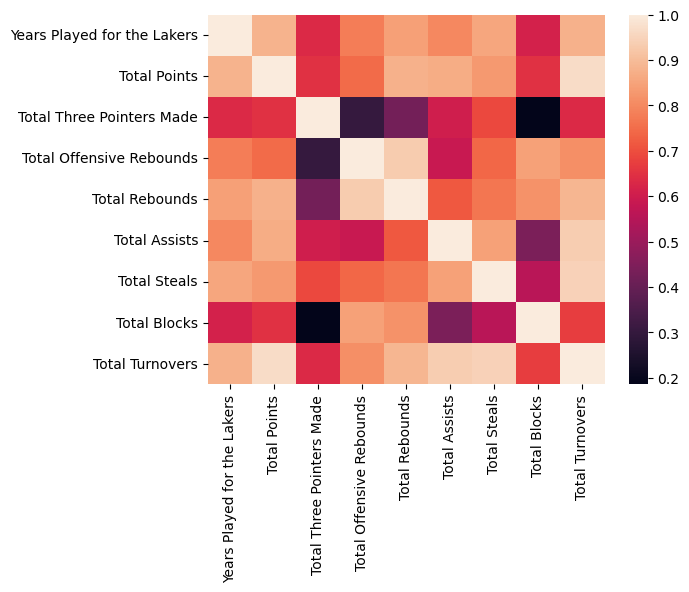

In [15]:
# For visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr)

In [16]:
# Let's pick a few interesting one to analyze

# Correlation between number of threes made and total rebounds
# The relationship is weak because bigger players are less likely to attempt 3-pointers!
corr["Total Three Pointers Made"]["Total Rebounds"]

0.42616570600503

In [17]:
# Correlation between number of threes made and total blocks
corr["Total Three Pointers Made"]["Total Blocks"]

0.1852960290320633

In [18]:
# Correlation between years played for the Lakers and everything else
corr["Years Played for the Lakers"]

Years Played for the Lakers    1.000000
Total Points                   0.880648
Total Three Pointers Made      0.632623
Total Offensive Rebounds       0.777364
Total Rebounds                 0.841378
Total Assists                  0.799310
Total Steals                   0.855020
Total Blocks                   0.612223
Total Turnovers                0.876783
Name: Years Played for the Lakers, dtype: float64

In [32]:
# Let's use regression to naively predict a Laker's player stats after playing for n years 
from sklearn.linear_model import LinearRegression

# Initalize the models
points = LinearRegression()
rebounds = LinearRegression()
steals = LinearRegression()
blocks = LinearRegression()

# Will be the independent variables for all variables
ind = ["Years Played for the Lakers"]

# Years vs. Total Points
dep1 = "Total Points"
points.fit(df_clean[ind].values, df_clean[dep1].values) # only use values to remove warnings 

# print(points.coef_)
# print(points.intercept_) # This doesn't make sense in this context (i.e you can't score negative points)

pts = points.predict([ [20] ])[0]
pts

22332.044481571567

In [20]:
# Years vs. Total Rebounds

# df_clean["Total Rebounds"] has NaN values
# Replace all NaN values with 0
# Create a copy of the dataframe to prevent changing the original dataframe 
temp = df_clean.fillna(0)

dep2 = "Total Rebounds"
rebounds.fit(temp[ind].values, temp[dep2].values)

trbs = rebounds.predict([ [10] ])[0]
trbs

3996.4223068375222

In [21]:
# Years vs. Total Rebounds
dep3 = "Total Steals"
steals.fit(temp[ind].values, temp[dep3].values)

stls = steals.predict( [[10] ])[0]
stls

513.8546271185132

In [22]:
dep4 = "Total Blocks"
blocks.fit(temp[ind].values, temp[dep4].values)

blks = blocks.predict( [[10]] )[0]
blks

343.094684000715

In [23]:
print("An average Lakers player will average {} points, {} rebounds, {} blocks, and {} steals after playing in \
      the NBA for 10 years.".format(int(pts), int(trbs), int(stls), int(blks)))

An average Lakers player will average 10439 points, 3996 rebounds, 513 blocks, and 343 steals after playing in       the NBA for 10 years.


In [24]:
df_clean.columns

Index(['From', 'To', 'Player', 'Years Played for the Lakers', 'Total Points',
       'Total Three Pointers Made', 'Total Offensive Rebounds',
       'Total Rebounds', 'Total Assists', 'Total Steals', 'Total Blocks',
       'Total Turnovers'],
      dtype='object')

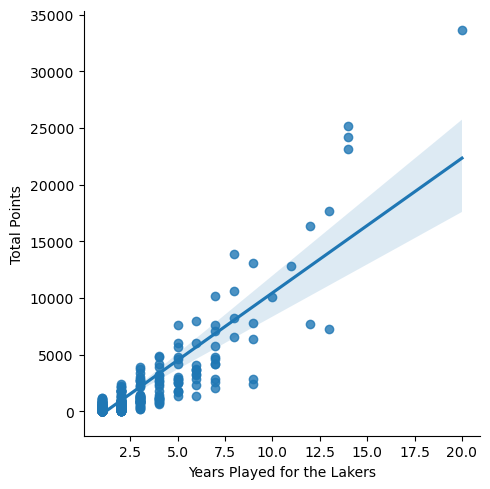

In [25]:
import seaborn as sns
sns.lmplot(x = "Years Played for the Lakers", y = "Total Points", data = df_clean)            

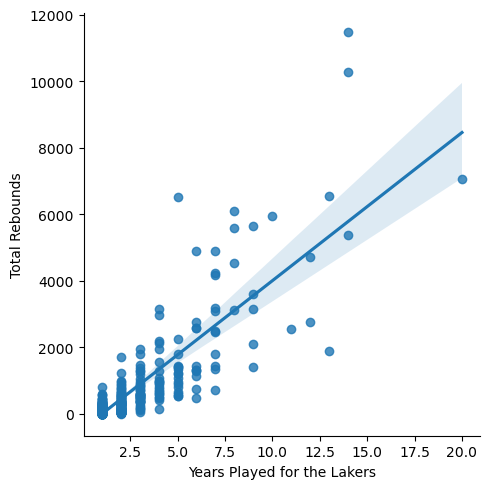

In [26]:
sns.lmplot(x = "Years Played for the Lakers", y = "Total Rebounds", data = df_clean)

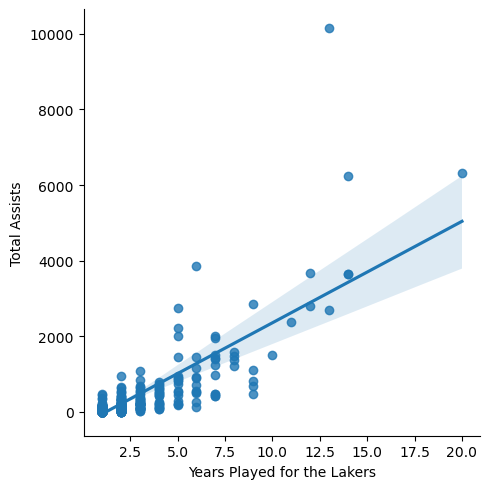

In [27]:
sns.lmplot(x = "Years Played for the Lakers", y = "Total Assists", data = df_clean)

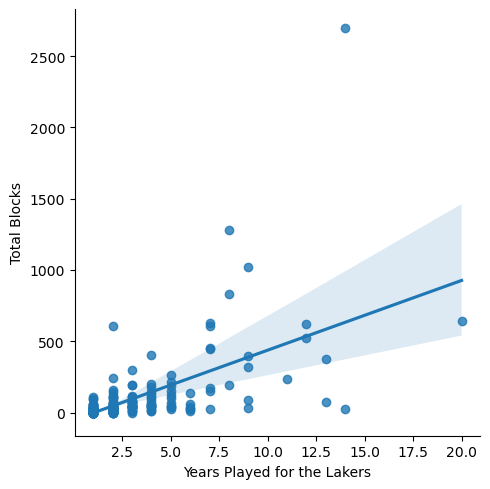

In [28]:
sns.lmplot(x = "Years Played for the Lakers", y = "Total Blocks", data = df_clean)  